# info
This notebook builds a heatmap of conditionally essential gene pairs. <br>

In [1]:
import numpy, pickle, seaborn

In [2]:
import matplotlib, matplotlib.pyplot
matplotlib.rcParams.update({'font.size':20, 'font.family':'sans-serif', 'xtick.labelsize':20, 'ytick.labelsize':20, 'figure.figsize':(15, 10)})

# 0. user-defined variables

In [3]:
# drangajokull
heatmap_info_file = '/home/adrian/projects/endomevu/results/heatmap.doubleKO.pickle'

# 1. read data

In [4]:
%%time
jar = heatmap_info_file
f = open(jar,'rb')
conditional_essentiality = pickle.load(f)
f.close()

CPU times: user 95 ms, sys: 12.4 ms, total: 107 ms
Wall time: 107 ms


# 2. prepare data to plot

In [5]:
# 2248 is the number of model genes

all_essential_elements = []
for genepair in conditional_essentiality:
    for element in genepair:
        if element not in all_essential_elements:
            all_essential_elements.append(element)
print(len(all_essential_elements), all_essential_elements[:3])

2248 ['54675.1', '5279.1', '8654.1']


In [6]:
cls = '54675.1' # 2,435 conditions is essential
print(len(all_essential_elements))
if cls in all_essential_elements:
    print('removing cardiolipin synthase')
    all_essential_elements.remove(cls)
    
# guk = '2987.1'
# if guk in all_essential_elements:
#     print('removing guk')
#     all_essential_elements.remove(guk)

    
print(len(all_essential_elements))

full = []
for i in range(len(all_essential_elements)):
    line = []
    for j in range(len(all_essential_elements)):
        geneA = all_essential_elements[i]
        geneB = all_essential_elements[j]

        count = 0
        forward = (geneA, geneB); reverse = (geneB, geneA)
        if forward in conditional_essentiality:
            count = len(conditional_essentiality[forward])
            #print(geneA, geneB, 'forward', count)
        if reverse in conditional_essentiality:
            count = len(conditional_essentiality[reverse])
            #print(geneA, geneB, 'reverse', count)
            
        # appending line
        if count > 100:
            print(count, forward)
        line.append(count)
        
    # appending matrix
    full.append(line)

2248
removing cardiolipin synthase
2247
2435 ('6241.1', '2987.1')
2435 ('2987.1', '6241.1')
2435 ('2987.1', '50484.1')
2435 ('2987.1', '60386.1')
2435 ('2987.1', '6240.1')
2435 ('50484.1', '2987.1')
2435 ('60386.1', '2987.1')
2435 ('6240.1', '2987.1')


2435 ('6241.1', '2987.1')
2435 ('2987.1', '6241.1')
2435 ('2987.1', '50484.1')
2435 ('2987.1', '60386.1')
2435 ('2987.1', '6240.1')
2435 ('50484.1', '2987.1')
2435 ('60386.1', '2987.1')
2435 ('6240.1', '2987.1')

In [7]:
pm = numpy.array(full)
pm

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [8]:
rpm = pm/numpy.max(pm)
rpm

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

# 3. plot

In [9]:
#mask = numpy.triu(numpy.ones_like(rpm, dtype=bool))

<AxesSubplot:>

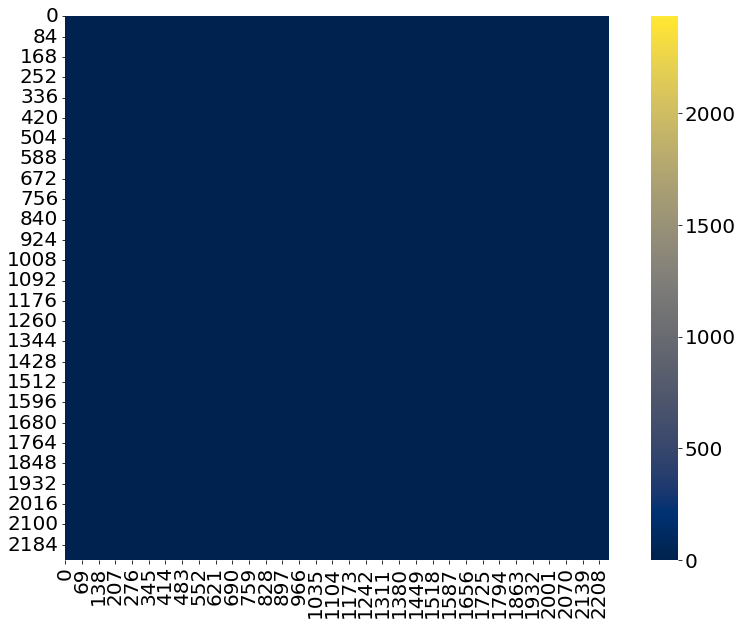

In [10]:
seaborn.heatmap(pm, cmap='cividis', square=True)